# Airbnb Seattle 2016

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


sns.set()
plt.rcParams["figure.figsize"] = (9, 5)


In [20]:
calendar = pd.read_csv('data/calendar.csv', parse_dates=['date'])
listings = pd.read_csv('data/listings.csv', parse_dates=['host_since'])
reviews  = pd.read_csv('data/reviews.csv', parse_dates=['date'])

print(f'Calendar dataset shape: {calendar.shape}')
print(f'Listings dataset shape: {listings.shape}')
print(f'Reviews  dataset shape: {reviews.shape}')

Calendar dataset shape: (1393570, 4)
Listings dataset shape: (3818, 92)
Reviews  dataset shape: (84849, 6)


### Listings dataset

In [21]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [22]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   object        
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

In [23]:
super_hosts     = listings[listings['host_is_superhost'] == 't']
not_super_hosts = listings[listings['host_is_superhost'] == 'f']

print(f'Number of super-hosts: {len(super_hosts)}')
print(f'Number of not super-hosts: {len(not_super_hosts)}')

Number of super-hosts: 778
Number of not super-hosts: 3038


### Are the missing columns a thing? Do super-hosts have everything filled out?

In [24]:
super_hosts.isna().sum()

id                                   0
listing_url                          0
scrape_id                            0
last_scraped                         0
name                                 0
                                    ..
cancellation_policy                  0
require_guest_profile_picture        0
require_guest_phone_verification     0
calculated_host_listings_count       0
reviews_per_month                   27
Length: 92, dtype: int64

In [18]:
super_hosts

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55
10,175576,https://www.airbnb.com/rooms/175576,20160104002432,2016-01-04,Private Apartment - Queen Anne Hill,Queen Anne Hill is a charming neighborhood wit...,Be close to everything! Queen Anne Hill is a ...,Queen Anne Hill is a charming neighborhood wit...,none,Queen Anne Hill is a wonderful and historic ar...,...,10.0,f,NaN,WASHINGTON,f,moderate,t,f,1,3.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,609701,https://www.airbnb.com/rooms/609701,20160104002432,2016-01-04,Charming Fremont Garden Cottage,Enjoy the excitement of Seattle and city life ...,Charming and pristine pied-a-terre in the mids...,Enjoy the excitement of Seattle and city life ...,none,FREMONT is such a fun neighborhood with lot's ...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,1,5.57
3801,4524575,https://www.airbnb.com/rooms/4524575,20160104002432,2016-01-04,Comfortable Fremont Apartment,This lovely apartment is located on the lower ...,Our recently renovated apartment is perfect fo...,This lovely apartment is located on the lower ...,none,Fremont is centrally located within the city a...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.05
3804,7178490,https://www.airbnb.com/rooms/7178490,20160104002432,2016-01-04,Cedar House Studio Suite in Fremont,"Comfortable and clean, this lower level suite ...","A lush, private garden path leads to the entra...","Comfortable and clean, this lower level suite ...",none,Upper Fremont is a vibrant neighborhood that o...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.34
3806,5458027,https://www.airbnb.com/rooms/5458027,20160104002432,2016-01-04,Sunny Charm in Urban Cottage 2BD,Charming urban home with rustic cottage feel. ...,NaN,Charming urban home with rustic cottage feel. ...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,2,0.24


In [5]:
listings['host_is_superhost'].value_counts(normalize=True)

f    3038
t     778
Name: host_is_superhost, dtype: int64

## Super-hosts

In [25]:
super_hosts = super_hosts[['host_id', 'host_since', 'host_about', 'host_response_rate', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified']]

print(f'Number of unique hosts: {super_hosts.host_id.nunique()}')

Number of unique hosts: 537


### How long does it take to become a super host?

In [39]:
max_date = pd.to_datetime('2016-01-04')
super_hosts['year_active'] = max_date.year - super_hosts['host_since'].dt.year
super_hosts['year_active']

1       3
6       4
7       4
9       3
10      6
       ..
3796    4
3801    2
3804    5
3806    3
3812    4
Name: year_active, Length: 778, dtype: int64

AttributeError: 'Rectangle' object has no property 'title'

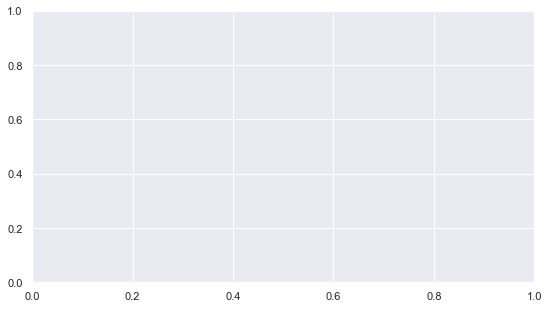

In [42]:
sns.countplot(data=super_hosts, x='year_active')
plt.title('')

    # Questions
1. How long does it take to become a super host?
2. What neighbourhoods do they locate in?
3. How many listings do super-hosts have in comparison to the rest?
4. What amenities do they offer?
5. Do state locations matter?
6. How do the super hosts select customers?
